In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model
import time  # Import time module for measuring latency


In [16]:

# Load the saved model
model = load_model(r'E:\RESNET\Data_Agumentation\augmented_resnet_mnist_model.h5')  # Replace with the correct model path


In [17]:

# Load MNIST data
(_, _), (x_test, y_test) = mnist.load_data()

# Normalize and reshape the image to (28, 28, 1)
x_test = x_test / 255.0
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Pick a random image
random_index = np.random.randint(0, x_test.shape[0])
random_image = x_test[random_index]
true_label = y_test[random_index]


In [18]:

# Measure the time before prediction
start_time = time.time()

# Make a prediction
prediction = model.predict(np.expand_dims(random_image, axis=0))

# Measure the time after prediction
end_time = time.time()

# Calculate the latency
latency = end_time - start_time



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


Prediction latency: 0.277151 seconds


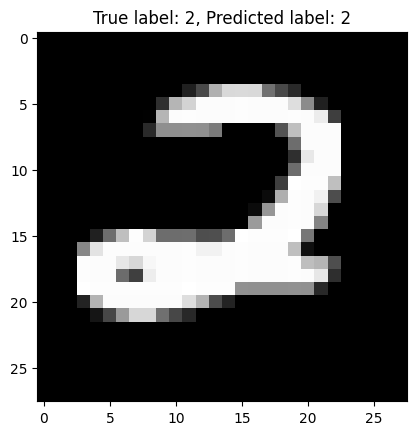

In [19]:
# Extract the predicted label
predicted_label = np.argmax(prediction)
# Print the latency
print(f"Prediction latency: {latency:.6f} seconds")

# Plot the image
plt.imshow(random_image.squeeze(), cmap='gray')
plt.title(f"True label: {true_label}, Predicted label: {predicted_label}")
plt.show()




In [20]:
# Print whether the prediction is correct or not
if true_label == predicted_label:
    print(f"The prediction is correct! Predicted: {predicted_label}")
else:
    print(f"The prediction is incorrect. Predicted: {predicted_label}, True label: {true_label}")


The prediction is correct! Predicted: 2
